# PREP:
- Goal: leave this section with a dataset that is ready to be analyzed. **Data types** are appropriate, **missing values** have been addressed, as have any data integrity issues.

- The ad hoc part includes **plotting the distributions of individual variables** and using those plots to identify **outliers** and if those should be handled (and if so, how), identify **unit scales** to identify how to best scale the numeric data, as well as finding **erroneous or invalid data** that may exist in your dataframe.

- Add a **data dictionary** in your notebook that defines all fields used in either your model or your analysis, and answers the question: **why did you use the fields you used**, e.g. why did you use bedroom_field1 over bedroom_field2, not why did you use number of bedrooms!

- `prep.py`: The reproducible part is the handling of missing values, fixing data integrity issues, changing data types, etc.

In [1]:
from acquire import acquire_data
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## Data Cleaning

In [2]:
df = acquire_data()
df.head()

,home_size,bedroomcnt,bathroomcnt,home_value
0,2082.0,0.0,0.0,527930.0
1,1000.0,0.0,0.0,27400.0
2,1604.0,4.0,2.0,498347.0
3,2384.0,3.0,3.0,549917.0
4,1574.0,3.0,2.0,235272.0


In [3]:
df.shape

(21943, 4)

In [4]:
df.dtypes

home_size      float64
bedroomcnt     float64
bathroomcnt    float64
home_value     float64
dtype: object

In [5]:
df.isnull().sum()

home_size      195
bedroomcnt       0
bathroomcnt      0
home_value     151
dtype: int64

In [6]:
df[df.home_size.isnull()].head(5)

,home_size,bedroomcnt,bathroomcnt,home_value
8,NaN,0.0,0.0,5240710.0
1616,NaN,0.0,0.0,19.0
2781,NaN,0.0,0.0,9710604.0
2849,NaN,0.0,0.0,5356597.0
2881,NaN,0.0,0.0,2274642.0


In [7]:
df[df.home_value.isnull()].head()

,home_size,bedroomcnt,bathroomcnt,home_value
5375,807.0,3.0,1.0,NaN
5380,1920.0,5.0,2.0,NaN
11800,1197.0,3.0,3.0,NaN
13073,NaN,0.0,0.0,NaN
13108,1344.0,0.0,0.0,NaN


In [8]:
# since Null doesn't make any sense here I will drop those rows 
df.dropna(inplace = True)

In [9]:
#check shape
df.shape

(21604, 4)

In [10]:
#validate if there is still null
df.isnull().sum()

home_size      0
bedroomcnt     0
bathroomcnt    0
home_value     0
dtype: int64

In [11]:
# since it does not make any sense if a unit without a bathroom, check if there is any
(df.bathroomcnt == 0).sum()

258

In [12]:
# check the data shape
df[df.bathroomcnt == 0].head(8)

,home_size,bedroomcnt,bathroomcnt,home_value
0,2082.0,0.0,0.0,527930.0
1,1000.0,0.0,0.0,27400.0
1799,260.0,1.0,0.0,9265.0
1800,400.0,0.0,0.0,7817.0
1912,881.0,0.0,0.0,121159.0
2142,842.0,0.0,0.0,107823.0
2304,1628.0,3.0,0.0,112827.0
2562,1572.0,0.0,0.0,400717.0


In [13]:
#drop those rows 
df = df[df.bathroomcnt != 0]
df.shape

(21346, 4)

In [14]:
#check data integrity 
df.describe()

,home_size,bedroomcnt,bathroomcnt,home_value
count,21346.000000,21346.000000,21346.000000,2.134600e+04
mean,1796.009135,3.205472,2.298932,4.427494e+05
std,953.419715,1.173351,1.045353,5.868291e+05
min,215.000000,0.000000,1.000000,5.942000e+03
25%,1206.000000,2.000000,2.000000,1.866392e+05
50%,1567.000000,3.000000,2.000000,3.169130e+05
75%,2114.000000,4.000000,3.000000,5.104338e+05
max,26345.000000,25.000000,20.000000,1.912982e+07


## Ploting - Identify outliers

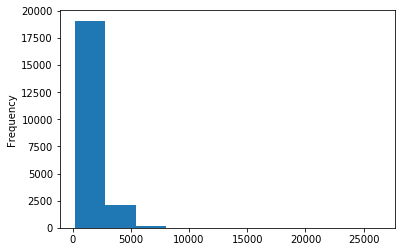

In [15]:
# home_size
df.home_size.plot.hist()

In [16]:
# by looking at the plot, majority of the points located below  5000, check the percenticle to
#keep the data below 99 percentile
home_size_percentile = df.home_size.quantile(.99)

In [17]:
df = df[df.home_size <= home_size_percentile]
df.shape

(21132, 4)

In [18]:
percentile

5081.549999999999

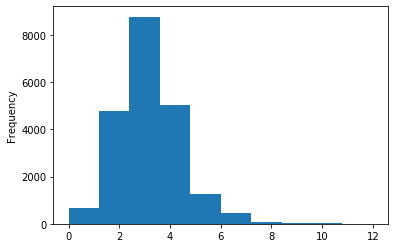

In [19]:
# bedroomcnt
df.bedroomcnt.plot.hist()

In [20]:
#percentile 
bedroom_percentitle = df.bedroomcnt.quantile(.99)
bedroom_percentitle

7.0

In [21]:
# drop the outliers
df = df[df.bedroomcnt <= bedroom_percentitle]
df.shape

(20978, 4)

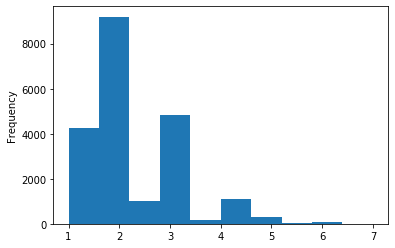

In [22]:
# bathroomcnt
df.bathroomcnt.plot.hist()

In [23]:
#check outliers
bathroom_percentile = df.bathroomcnt.quantile(.99)
bathroom_percentile

5.0

In [24]:
#drop the outliers
df = df[df.bathroomcnt <= bathroom_percentile]
df.shape

(20866, 4)

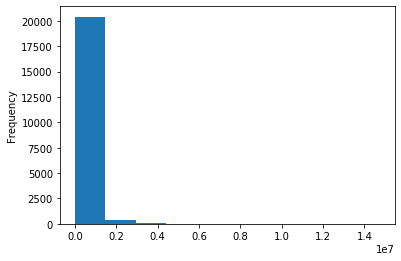

In [25]:
#homevalue
df.home_value.plot.hist()

In [26]:
#check outliers
homevalue_percentile = df.home_value.quantile(.99)
homevalue_percentile

2046066.7499999974

In [27]:
#drop outliers
df = df[df.home_value <= homevalue_percentile]
df.shape

(20657, 4)

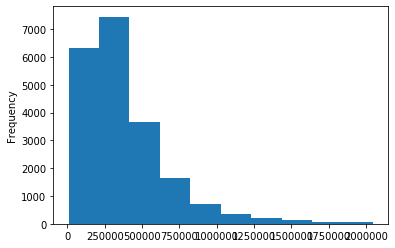

In [28]:
df.home_value.plot.hist()

## Data dictionary

Add a data dictionary in your notebook that defines all fields used in either your model or your analysis, and answers the question: why did you use the fields you used, e.g. why did you use bedroom_field1 over bedroom_field2, not why did you use number of bedrooms!

In [33]:
data_dict = pd.DataFrame({
    'fields':df.columns, 
    'reason':  [1,2,3,4]
})


,fields,reason
0,home_size,1
1,bedroomcnt,2
2,bathroomcnt,3
3,home_value,4
